In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
y

tensor([9.], grad_fn=<AddBackward0>)

In [7]:
x

tensor([2.], requires_grad=True)

In [8]:
x = torch.tensor([1.,2.,3.], requires_grad=True)
print(x.grad)
y = x.sum()
print(x.grad)
y.backward()
print(x.grad)

None
None
tensor([1., 1., 1.])


In [9]:
# Exercise 1.
# Compute the gradient for the sigmoid activation function in 2
# points using pytorch and check it with the known explicit formula
x1 = torch.tensor([0.], requires_grad=True) # Gradient should be max
x2 = torch.tensor([100.], requires_grad=True) # Gradient should -> 0
y1 = 1 / (1 + torch.exp( -1 * x1))
y2 = 1 / (1 + torch.exp( -1 * x2))
y1.backward()
y2.backward()
print("Gradient at x = 0 is {:.6f}".format(x1.grad.item()))
print("Gradient at x = 0 is {:.6f}".format((y1 * (1 - y1)).item()))
print("Gradient at x = 100 is {:.4f}".format(x2.grad.item()))
print("Gradient at x = 100 is {:.3f}".format((y1 * (1- y2)).item()))

Gradient at x = 0 is 0.250000
Gradient at x = 0 is 0.250000
Gradient at x = 100 is 0.0000
Gradient at x = 100 is 0.000


In [10]:
# Exercise 2.
# Compute the gradient for the linear activation function in 2 
# points using pytorch and check it with the known explicit formula
x1 = torch.tensor([0.], requires_grad=True)
x2 = torch.tensor([100.], requires_grad=True)
y1 = x1
y2 = x2
y1.backward()
y2.backward()
print("Gradient at x = 0 is {:.6f}".format(x1.grad.item()))
print("Gradient at x = 0 is {:.6f}".format(1))
print("Gradient at x = 100 is {:.4f}".format(x2.grad.item()))
print("Gradient at x = 100 is {:.4f}".format(1))

Gradient at x = 0 is 1.000000
Gradient at x = 0 is 1.000000
Gradient at x = 100 is 1.0000
Gradient at x = 100 is 1.0000


In [11]:
# Execise 3.
# Compute the gradient for the relu activation function in 2
# points using pytorch and check it with the known explicit formula.
x1 = torch.tensor([-1.], requires_grad=True)
x2 = torch.tensor([100.], requires_grad=True)
y1 = torch.max(torch.tensor(0.0), x1)
y2 = torch.max(torch.tensor(0.0), x2)
y1.backward()
y2.backward()
print("Gradient at x = -1 is {:.6f}".format(x1.grad.item()))
print("Gradient at x = -1 is {:.6f}".format(0 if x1 <= 0 else 1))
print("Gradient at x = 100 is {:.5f}".format(x2.grad.item()))
print("Gradient at x = 100 is {:.5f}".format(0 if x2 <= 0 else 1))

Gradient at x = -1 is 0.000000
Gradient at x = -1 is 0.000000
Gradient at x = 100 is 1.00000
Gradient at x = 100 is 1.00000


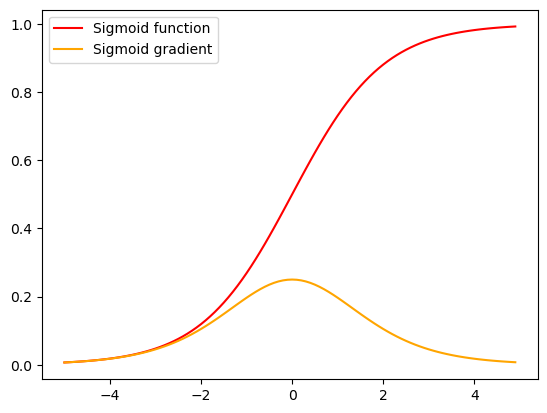

In [12]:
# Exercise 4.
# Write in python a function to plot the sigmoid activation function
# and its gradient using matplotlib
import matplotlib.pyplot as pplt
import numpy as np
def plot_sigmoid():
    x = np.arange(-5., 5, 0.1)
    y = 1 / (1 + np.exp(-1 * x))
    grad = y * (1 - y)
    pplt.plot(x,y, color='r',label='Sigmoid function')
    pplt.plot(x,grad, color='orange', label='Sigmoid gradient')
    pplt.legend()
    pplt.show()
plot_sigmoid()

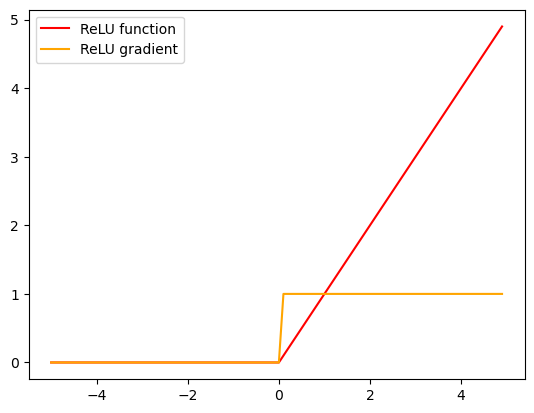

In [13]:
# Exercise 5.
# Write in python a function to plot the ReLU activation function
# and its gradient using matplotlib.

def plot_relu():
    x = np.arange(-5., 5, 0.1)
    y = np.maximum(0, x)
    grad = np.where(x >= 0, 1, 0)
    pplt.plot(x, y, color='r',label='ReLU function')
    pplt.plot(x, grad, color='orange', label='ReLU gradient')
    pplt.legend()
    pplt.show()
plot_relu()

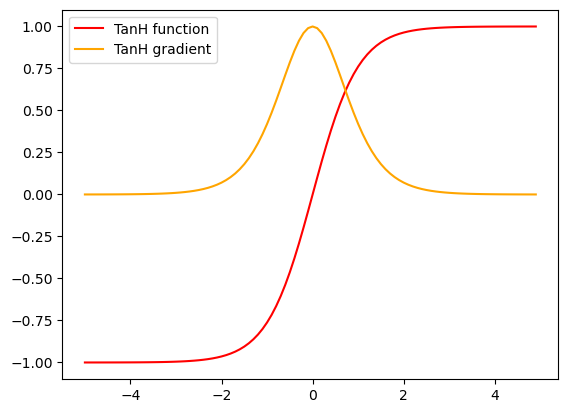

In [14]:
# Exercise 6.
# Write in python a function to plot the tanh activation function
# and its gradient using matplotlib

def plot_tanh():
    x = np.arange(-5., 5, 0.1)
    y = np.tanh(x)
    grad = 1 - (np.tanh(x) ** 2)
    pplt.plot(x, y, color='r',label='TanH function')
    pplt.plot(x, grad, color='orange', label='TanH gradient')
    pplt.legend()
    pplt.show()
plot_tanh()

In [15]:
import torch
import torch.nn as nn
INPUT_SIZE = 2
OUTPUT_SIZE = 1
class Perceptron(nn.Module):
    def __init__ (self, input_dim, output_dim):
                  super(Perceptron, self).__init__()
                  self.linear = nn.Linear(input_dim, output_dim)
                  self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

In [16]:
perceptron = Perceptron(INPUT_SIZE, OUTPUT_SIZE)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

tensor([0.3785], grad_fn=<SigmoidBackward0>)


In [17]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  
# Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, INPUT_SIZE))
labels = torch.randint(0, 2, (10, OUTPUT_SIZE)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5209
Epoch [200/1000], Loss: 0.5185
Epoch [300/1000], Loss: 0.5184
Epoch [400/1000], Loss: 0.5184
Epoch [500/1000], Loss: 0.5184
Epoch [600/1000], Loss: 0.5184
Epoch [700/1000], Loss: 0.5184
Epoch [800/1000], Loss: 0.5184
Epoch [900/1000], Loss: 0.5184
Epoch [1000/1000], Loss: 0.5184


In [18]:
# Exercise 8:
# Implement a binary classification model using the Perceptron class in PyTorch 
# for the logic OR.
# Your task is to create a Perceptron instance and train it using a proper 
# dataset and the binary cross-entropy loss with stochastic gradient descent optimizer.
# Here are the steps you can follow:
#    Define a Perceptron class that inherits from torch.nn.Module and implements a
#  binary classification model.
#    Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.
#    Define a stochastic gradient descent optimizer using the torch.optim.SGD module.
#    Train the Perceptron model on the training set using the binary cross-entropy
# loss and stochastic gradient descent optimizer.
#
#Evaluate the trained model compute the accuracy.
perceptORn = Perceptron(INPUT_SIZE, OUTPUT_SIZE)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(perceptORn.parameters(), lr=0.1)  

input_data = torch.randint(0,2,(1000, INPUT_SIZE)).float()
labels = torch.tensor([[1.] if (x[0] or x[1]) else [0.] for x in input_data])

num_epochs = 1_000
for epoch in range(num_epochs):
    outputs = perceptORn(input_data)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3834
Epoch [200/1000], Loss: 0.2940
Epoch [300/1000], Loss: 0.2361
Epoch [400/1000], Loss: 0.1962
Epoch [500/1000], Loss: 0.1671
Epoch [600/1000], Loss: 0.1452
Epoch [700/1000], Loss: 0.1280
Epoch [800/1000], Loss: 0.1143
Epoch [900/1000], Loss: 0.1031
Epoch [1000/1000], Loss: 0.0938


In [19]:
test_inputs = torch.randint(0,2,(100, INPUT_SIZE)).float()
test_labels = torch.tensor([[1.] if (x[0] or x[1]) else [0.] for x in test_inputs])

test_outputs = perceptORn(test_inputs)
test_accuracy = criterion(test_labels, test_outputs)
print(f"Test accuracy: {100.-test_accuracy.item():.2f}%")

Test accuracy: 90.59%
